<a href="https://colab.research.google.com/github/ijunseo/Deeplearning_self_study/blob/main/%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E3%82%A8%E3%83%83%E3%82%BB%E3%83%B3%E3%82%B9%E7%B7%B4%E7%BF%92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Update




*   25.01.16 ライブラリーのmethodを中心に読みやすくmarkdownを作成
*   25.01.17 matplotの内容追加、numpy.randomの内容追加
*   25.01.19 数理最適化の内容を追加
*   25.01.21 数理最適化に二次計画法と勾配降下法の内容を追加
*   25.01.22 ニュートン法、ラグランジュ未定乗数法の復習と実装について勉強、統計関連内容追加


#ライブラリー


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import cvxopt

#参考
[KIYOさんのブログ](https://note.com/kiyo_ai_note/n/n835dd978ea35)

[機械学習のエッセンス加藤公一著](https://www.sbcr.jp/product/4797393965/)

[詳解ディープラーニング 第2版](https://book.mynavi.jp/ec/products/detail/id=109454)

#numpy(行列関連）



```python
import numpy as np #numpyをnpとしてインポート
```


##行列生成
```python
np.empty((3, 6))# 3 x 6の行列を生成（要素はダミーなので一定ではない）
np.zeros((2, 2))# 2 x 2の行列を生成（要素が0）
np.ones((2, 2))# 2 x 2の行列を生成（要素が1）
np.full(([a, b], c)) # a x b行列の要素をすべてc に埋める
np.eye((2, 5)) # 2 x 5行列を作って、[a, a] 要素を1 にする行列を作成
np.arange(9).reshape(3, 3)# 3 x 3の行列を生成（0 ~ 8までの要素）
```


##行列要素確認
```python
array.shape #(多次元)配列の形状
array.dtype #配列内のデータ型
array.ndim #配列の次元数(a x bなら 1, a x b x cなら2 ....)
array.size #配列全体のパラメータ数(要素の数）
```


##行列積
```python
np.dot(a, b)
a.dot(b)
a @ b
#行列積計算
```


##行列ソート
```python
np.sort()#[::-1] #配列を降順にソート
a_sort = np.sort(a_2dim) #配列を昇順にソート
a_sortax0 = np.sort(a_2dim, axis=0) #行方向に昇順にソート
a_sortinv = np.sort(a_2dim)[::-1] #配列を降順にソート
a_sort1dim = np.sort(a_2dim, axis=None) #1次元配列に変換
a_sortall = np.sort(a_2dim, axis=None).reshape(a_2dim.shape) #1次元配列でソート後にreshapeで形状復元

"""
出力
array([[  0,  10,  30,  50,  60,  70],
       [ 20,  40,  80,  90, 100, 110]])
array([[ 60,   0,  20,  30,  50,  10],
       [100,  80,  70,  40,  90, 110]])
array([[ 20,  40,  80,  90, 100, 110],
       [  0,  10,  30,  50,  60,  70]])
array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110])
array([[  0,  10,  20,  30,  40,  50],
       [ 60,  70,  80,  90, 100, 110]])
"""

```


##転置行列(transpose)
```python
array.T
np.transpose(array)
```


##条件を満たす値を探す
```python
np.where(array > 7, 0, 1) #np.where（条件、置き換える値、条件を満たさない要素の値）

[Out]
array([[1, 1, 1, 1, 1, 1],
       [1, 1, 0, 0, 0, 0]])

----------------------------------------------------------------
a_bool = array > 7 #7超の数値はTrue, 以下はFalse
a_up7 = array[array > 7] #7超の数値のみ抽出

[Out]
array([[False, False, False, False, False, False],
       [False, False,  True,  True,  True,  True]])
array([ 8,  9, 10, 11])
```


##上限下限設定
```python
np.clip(array,2,7)
#2より小さい要素を2に、7より大きい要素を7にする
```


##linalg module

```python
np.linalg.inv(array)#逆行列
np.linalg.solve(array1, array2)# (array1) * x = (array2)を計算する
np.linalg.det(array)#行列式
eig_val , eig_vec = np.linalg.eig(array)#固有値と固有ベクトル
```

#numpy(その他）

##統計関連

```python
#np.--(array) or array.--()
np.sum(array)
array.sum() #要素の合計
np.mean(array)#平均
np.var(array)#分散
np.std(array)#標準偏差
----------
#NANを無視した統計
np.nansum(array)#NAN値を無視した合計
np.nanmean(array)#NAN値を無視した平均
----------
np.argmax(array)#最大値のindexをreturn
np.argmin(array)#最小値のindexをreturn
'''
2 x 2の場合
0 1
2 3
のindexを持つ
'''
```



##乱数（random）
```python
np.random.seed(a) # seedを設定（seed指定することで再現性を持つ）

------------------

np.random.rand() # [0, 1)範囲内の乱数を返す
#output : 0.9814873822149259
np.random.rand(a, b) # a x bの乱数行列を生成
np.random.rand(a) # a個の乱数を生成

np.random.randint(a, b) # a ~ b random intを生成
np.random.randint(a, b, size = (3, 3)) # 3 x 3行列、要素は a ~ bのint
```

#scipy

```python
a = scipy.sparse.lil_matrix((4, 5)) # 4 x 5零行列を生成
a[1, 1] = 3 # [a, b] = c で a 行 b 列の要素を c にする[1][1]ではない
a.toarray() # 行列(array)化する
```
##LU分解
```python
scipy.linalg.lu_factor(array)
#LU分解を行って2つの結果をreturn
#1はLとUを結合して1つの行列にしたもの（行列の積ではない）2はPivot

scipy.linalg.lu_solve((return1, return2), vec)
```

#データ可視化

##matplotlib
```python
#インポート
import matplotlib.pyplot as plt
```
```python
#線の形
plt.--.(x, y, color = "-", linestyle = (形))
```
```python
#subplots
```
![](https://cdn-ak.f.st-hatena.com/images/fotolife/Y/YutaKa/20210119/20210119163727.png)


###折れ線
```python
# x, yが点
plt.plot(x, y, color = "r")
plt.plot(x, y, 'r')
```

###散布図
```python
plt.scatter(x, y, color = "r")
```

###曲線グラフ

```python
#x, yが連続データ
plt.plot(x, y, color = "r")
"""
例
x = np.linspace(-10, 10, 500)
y = x ** 2
"""
```


###ヒストグラム
```python
plt.hist(list, 範囲の個数, color = "...")
```

#数理最適化

##線形計画問題(scipy optimize)

線形的制約条件を見たす線形目的関数を最適化する

```python
'''
ex)
x + 4y <= 1700 ・・・ 式 1
2x + 3y <= 1400 ・・・ 式 2
2x + y <= 1000 ・・・ 式 3
x >= 0 ・・・ 式 4
y >= 0 ・・・ 式 5
の制約条件を満たす
3x + 4yのmax値は？
'''

#解法
#3x + 4y -> max は　3x + 4y -> minを求めることに言い換える。
from scipy import optimize
import numpy as np
c = np.array([-3, -4])
G = np.array([[1, 4],[2, 3],[2, 1]])# ・・・ 式 1 ~ 3
h = np.array([1700, 1400, 1000])
solv = optimize.linprog(c, A_ub = G, b_ub = h, bounds = (0, None)
#(0, None) can be [(0, None), (0, None)] -  ・・・ 式 4~ 5

print(solv.x)
print(solv.fun)

'''
出力
[400. 200.]
- 1999.9999999999998
'''
```
```python
scipy.optimize

c : 目的関数の係数を示すarray

A_ub, b_ub : 制約条件の線形不等式(<=)の係数
# Ax <= bの関係

A_eq, b_eq : 制約条件の線形等式(=)の関係
# Ax = b

bounds : 変数の範囲各々の変数別に(min, max)のboundを設定
# (0, None) can be [(0, None), (0, None)] -  ・・・ 式 4~ 5

method : 解決方法で'highs', 'revised simplex', 'simplex'があり、基本設定は'highs'
  ```

##二次計画法(cvxopt)

$\ \frac{1}{2}  x^{T}Px + q^{T}x  $は

$\ x^2 + xy + y^2 + 2x + 4y$だとすると、

$P =  \begin{bmatrix}2 & 1 \\1 & 2 \end{bmatrix} $

$q = \begin{bmatrix}2 \\4 \end{bmatrix} $になる

この時の最小値を求めると

```python
P = cvxopt.matrix(np.array[[2, 1], [1, 2]])
q = cvxopt.matrix(np.array[[2], [4]])

sol = cvxopt.solvers.qp(P, q)

np.array(sol["x"]) #最小値になる解(x ,y)を 1 x 2の行列で生成される
np.array(sol["primal objective"]) #最小値
```

条件付きの場合、例えば

$ Ax = b, Gx <= h$の条件があると

式1.

Minimize $f{(x, y)} = x^2 + xy + y^2 + 2x + 4y$

Subject to $ x + y = 0$

式2.

Minimize $f{(x, y)} = x^2 + xy + y^2 + 2x + 4y$

Subject to $ 2x + 3y <= 3$

```python
P = cvxopt.matrix(np.array[[2, 1], [1, 2]])
q = cvxopt.matrix(np.array[[2], [4]])

#式1
A = cvxopt.matrix(np.array[[1, 1]]])
b = cvxopt.matrix(np.array[0])
sol = cvxopt.solvers.qp(P, q, A = A, b = b)

#式2
G = cvxopt.matrix(np.array[[1, 1]]])
h = cvxopt.matrix(np.array[0])
sol = cvxopt.solvers.qp(P, q, G =G, h = h)
#制限条件の式が多いとGx <= hを満たすように変形して行列を入力
```

##勾配降下法

関数の初期点の座標を(a, b)とする。

また、この関数は z = x ^ 2 + y ^ 2のようにへこんでるとこが存在すると仮定する。

任意の(a, b)の勾配は

$ \frac{\partial f}{\partial x} $と

$ \frac{\partial f}{\partial y} $である。

この際にの漸化式は $  x_{k + 1} =  x_{k}- a \nabla f{(x_k)}  $である。

ここでaは学習率(Learning rate)で点の勾配行列$ \nabla $に対してどのくらいの倍率で座標を変換させるかを示す。

しかし、aが大きすぎると最適な解を超えて答えが収束できない問題が生じる可能性がある。

また、aが小さすぎるとLocal minimaに最適解が収束する、計算量が増えて無駄に時間がかかりすぎる問題がある。

よって、丁度良い（時間量も多すぎずLocal minimaにならない、収束ができる学習率aを探すのが重要。

![](https://raw.githubusercontent.com/angeloyeo/angeloyeo.github.io/master/pics/2020-08-16-gradient_descent/pic5.png)


また、$\|x_{k+1} - x_k\| < \epsilon$のように更新される値がある値以下になると関数を終了する条件の設定も重要。

その理由は $\epsilon$ が大きすぎると実際点が収束する前に関数が終ってしまうのと小さすぎると関数が無限ループに入ってしまう可能性があるからである。

##多次元でのニュートン法

$f_1(x, y) = x^3 - 2y = 0 $ ・・・式1

$f_2(x, y) = x^2 + y^2 - 1 = 0 $ ・・・式2

この時のヤコビアン行列は

$J_f(x) =  \begin{bmatrix}\frac{\partial f_1}{\partial x} & \frac{\partial f_1}{\partial y} \\\frac{\partial f_2}{\partial x} & \frac{\partial f_2}{\partial y} \end{bmatrix}  $

上の式より

$x_{k+ 1} = x_k - J_f(x_k)^{-1}f(x_k)$



##ラグランジュ未定乗数法


Minimize $f(x, y) = 5x^2 + 6xy + 5y^2 - 26x -26y$

Subject to $g(x, y) = x^2 + y^2 - 4 = 0$

この式を

$L(x, y, λ) = f(x, y) + λg(x, y)$

$= 5x^2 + 6xy + 5y^2 - 26x - 26y + λ(x^2 + y ^2 - 4)$

$∇L(x, y, λ) = 0 $ が成り立つ

よって\begin{bmatrix}\frac{\partial L}{\partial x} \\\frac{\partial L}{\partial y}\\\frac{\partial L}{\partial λ} \end{bmatrix}

が$ = ∇L = 0$を満たす。

その$x, y, λ$を探したら良い。



#統計関連

###統計関連(numpyより)

```python
#np.--(array) or array.--()
np.sum(array)
array.sum() #要素の合計
np.mean(array)#平均
np.var(array)#分散
np.std(array)#標準偏差
----------
#NANを無視した統計
np.nansum(array)#NAN値を無視した合計
np.nanmean(array)#NAN値を無視した平均
----------
np.argmax(array)#最大値のindexをreturn
np.argmin(array)#最小値のindexをreturn
'''
2 x 2の場合
0 1
2 3
のindexを持つ
'''
```



###正規分布関連(scipy. .. .norm)

```python
from scipy.stats import norm

y = norm.pdf(x, loc = 1, scale = 2)
#座標表面のxの範囲はxで指定
#loc = μ = 平均
#scale = σ = 標準偏差
```

```python
#確率密度関数の積分強度
y = norm.cdf(1.96) - norm.cdf(-1.96)
#0.950004209703559 = 95%の信頼区間
#x = 1, x = -1の時の確率密度関数の積分地
```

#5章~

#1~4章

In [2]:
from scipy.stats import norm
import numpy as np

x = np.linspace(-5, 5)
y = norm.cdf(1.96) - norm.cdf(-1.96)
print(y)

0.950004209703559


In [ ]:
import numpy as np

class percep(object):
    def __init__(self, input_dim):
        self.input_dim = input_dim
        self.d = np.random.normal(size = (input_dim,))
        self.b = 0

    def forward(self, x):
        return np.dot(self.d, x) + self.b

    def com_delta(self, x, t):
        y = self.forward(x)
        delta = y - t
        dw = delta * x
        db = delta
        return dw, db

def step(x):
    return 1 * (x > 0)


In [ ]:
d = 2
N = 100

mean = 5

x1 = np.random.randn(N // 2, d) + np.array([0, 0])
x2 = np.random.randn(N // 2, d) + np.array([mean, mean])

t1 = np.zeros(N // 2)
t2 = np.ones(N // 2)

x = np.concatenate((x1, x2), axis = 0)
t = np.concatenate((t1, t2))

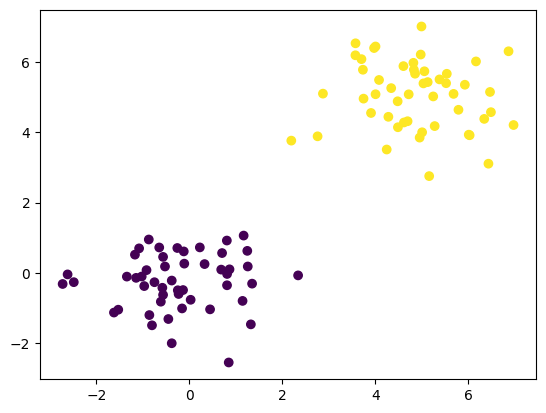

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x[:, 0], x[:, 1], c = t)
plt.show()

In [ ]:
model = percep(d)
eta = 0.1

In [ ]:

#解法
#3x + 4y -> max は　3x + 4y -> minを求めることに言い換える。
from scipy import optimize
import numpy as np
c = np.array([-3, -4], dtype = np.float64)
G = np.array([[1, 4],[2, 3],[2, 1]], dtype = np.float64)# ・・・ 式 1 ~ 3
h = np.array([1700, 1400, 1000], dtype = np.float64)
solv = optimize.linprog(c, A_ub = G, b_ub = h, bounds = (0, None))
#(0, None) can be [(0, None), (0, None)] -  ・・・ 式 4~ 5

print(solv.x)
print(-solv.fun)

[400. 200.]
1999.9999999999998


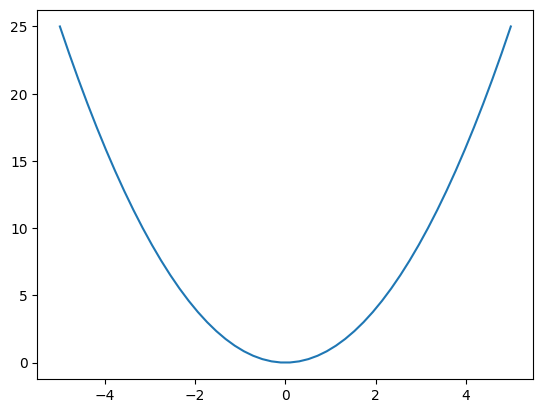

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-5, 5)
y = x ** 2
plt.plot(x, y)
plt.show()

In [ ]:
class person:
    def __init__(self, name, age):
        self.name = name
        self.age = age

student = person('A', 4)
print(student.name)
print(student.age)

A
4


In [ ]:
s = 0
for i in range(1000):
    s += 0.001
s

1.0000000000000007

In [ ]:
new_array = np.empty((3, 6))#要素が0でないことに注意
new_array

array([[ 3.22090466e-316,  0.00000000e+000,  1.61501212e-243,
        -1.74287009e-038,  6.82736430e+038, -1.59019978e+213],
       [-1.77108776e+299,  1.72532640e-254,  6.35987556e-176,
         1.05591916e-086,  1.34174322e-062,  3.04382637e-144],
       [ 8.68831098e-294, -2.83472953e-059, -5.03451380e+303,
         2.40783594e-286, -5.75898165e+172,  1.09383081e-302]])

In [ ]:
new_array = np.zeros((2, 2))#要素が0
new_array

array([[0., 0.],
       [0., 0.]])

In [ ]:
new_array = np.ones((2, 2))
new_array

array([[1., 1.],
       [1., 1.]])

In [ ]:
new_array = np.linspace(0, 100, 21)
new_array

array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
        55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100.])

In [ ]:
a = np.arange(9).reshape(3, 3)
print(a)
b = np.arange(3, 12).reshape(3, 3)
print(b)

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


In [ ]:
c = a@b#行列掛け算
print(c)

[[ 24  27  30]
 [ 78  90 102]
 [132 153 174]]


In [ ]:
matrix_multiplication = np.dot(a, b)
newmat = a.dot(b)
newmat1 = a@b
print(matrix_multiplication)
print(newmat)
print(newmat1)

[[ 24  27  30]
 [ 78  90 102]
 [132 153 174]]
[[ 24  27  30]
 [ 78  90 102]
 [132 153 174]]
[[ 24  27  30]
 [ 78  90 102]
 [132 153 174]]


In [ ]:
a = scipy.sparse.lil_matrix((4, 5))
a[1, 2] = 3
a.toarray()


array([[0., 0., 0., 0., 0.],
       [0., 0., 3., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [ ]:
a1 = a.tocsr()
a1

<4x5 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>

In [ ]:
print(f"data: {a1.data}")

data: []


In [ ]:
a = [[1,2,3,5,7,9,10,11],
             [1,2,3,5,7,9,10,12]]


print('argmax:', np.argmax(a),'argmin:', np.argmin(a)) #最大値のindex番号, 最小値のindex番号


argmax: 15 argmin: 0


In [ ]:
import numpy as np
from scipy.linalg import lu_factor, lu_solve

# 행렬 a 정의
a = np.array([[3, 1, 2],
              [6, 3, 4],
              [3, 2, 1]], dtype=float)

# LU 분해 수행
lu, piv = lu_factor(a)

print("LU 행렬:\n", lu)
print("Pivot 인덱스:\n", piv)

print("LU:", piv @ lu)
# 추가로 LU 분해로부터 해법을 찾을 수 있음
b = np.array([1, 2, 3], dtype=float)  # 예를 위한 b
x = lu_solve((lu, piv), b)  # LU 분해된 행렬과 b를 사용하여 x를 구함
print("해법 x:\n", x)

LU 행렬:
 [[ 6.   3.   4. ]
 [ 0.5 -0.5  0. ]
 [ 0.5 -1.  -1. ]]
Pivot 인덱스:
 [1 1 2]
LU: [7.5 0.5 2. ]
해법 x:
 [ 1.66666667 -0.         -2.        ]


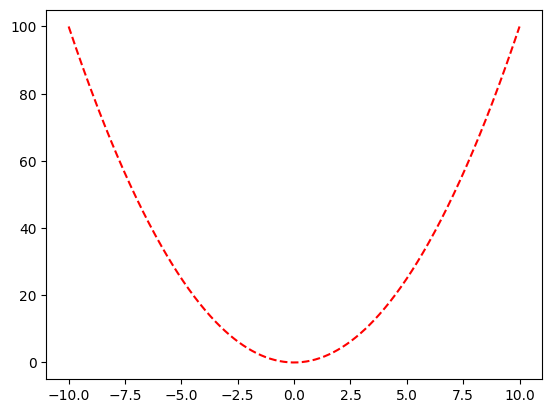

In [ ]:
x = np.linspace(-10, 10, 500)
y = x ** 2
fig, ax = plt.subplots()
ax.plot(x, y, 'r--')